In [1]:
import numpy as np
import pandas as pd


In [5]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Natural_language_processing\word2vec\all_kindle_review.csv")

In [6]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [9]:
data=data[['reviewText', 'rating']]

In [10]:
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [11]:
data.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [12]:
data['reviewText'].unique()

array(['Jace Rankin may be short, but he\'s nothing to mess with, as the man who was just hauled out of the saloon by the undertaker knows now. He\'s a famous bounty hunter in Oregon in the 1890s who, when he shot the man in the saloon, just finished a years long quest to avenge his sister\'s murder and is now trying to figure out what to do next. When the snotty-nosed farm boy he just rescued from a gang of bullies offers him money to kill a man who forced him off his ranch, he reluctantly agrees to bring the man to justice, but not to kill him outright. But, first he needs to tell his sister\'s widower the news.Kyla "Kyle" Springer Bailey has been riding the trails and sleeping on the ground for the past month while trying to find Jace. She wants revenge on the man who killed her husband and took her ranch, amongst other crimes, and she\'s not so keen on the detour Jace wants to take. But she realizes she\'s out of options, so she hides behind her boy persona as best she can and trie

In [13]:
data['rating'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [15]:
data ['rating']=data['rating'].apply(lambda x:0 if x < 3 else 1)

C:\Users\USER\AppData\Local\Temp\ipykernel_360\3646410552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ['rating']=data['rating'].apply(lambda x:0 if x < 3 else 1)


In [16]:
data['rating'].unique()

array([1, 0], dtype=int64)

In [17]:
data['rating'].value_counts()

rating
1    8000
0    4000
Name: count, dtype: int64

In [20]:
## Pre proccing steps
data['reviewText'].str.lower()

0        jace rankin may be short, but he's nothing to ...
1        great short read.  i didn't want to put it dow...
2        i'll start by saying this is the first of four...
3        aggie is angela lansbury who carries pocketboo...
4        i did not expect this type of book to be in li...
                               ...                        
11995    valentine cupid is a vampire- jena and ian ano...
11996    i have read all seven books in this series. ap...
11997    this book really just wasn't my cuppa.  the si...
11998    tried to use it to charge my kindle, it didn't...
11999    taking instruction is a look into the often hi...
Name: reviewText, Length: 12000, dtype: object

In [22]:
## removing special characters
import warnings
warnings.filterwarnings('ignore')
data['reviewText'] = data['reviewText'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
## removing extra spaces   
data['reviewText'] = data['reviewText'].str.replace('\s+', ' ', regex=True)
## removing leading and trailing spaces
data['reviewText'] = data['reviewText'].str.strip()


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_360\1428883963.py:4: SyntaxWarning: invalid escape sequence '\s'
  data['reviewText'] = data['reviewText'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_360\1428883963.py:6: SyntaxWarning: invalid escape sequence '\s'
  data['reviewText'] = data['reviewText'].str.replace('\s+', ' ', regex=True)


In [23]:
# Converting the text to a list of words
data['reviewText'] = data['reviewText'].apply(lambda x: x.split())
# Removing stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['reviewText'] = data['reviewText'].apply(lambda x: [word for word in x if word not in stop_words])
# Joining the words back into a single string
data['reviewText'] = data['reviewText'].apply(lambda x: ' '.join(x))
# Displaying the first few rows of the processed data
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText,rating
0,Jace Rankin may short hes nothing mess man hau...,1
1,Great short read I didnt want put I read one s...,1
2,Ill start saying first four books I wasnt expe...,1
3,Aggie Angela Lansbury carries pocketbooks inst...,1
4,I expect type book library pleased find price ...,1


In [24]:
##lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# Applying lemmatization
data['reviewText'] = data['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# Displaying the first few rows of the processed data
data.head()

,reviewText,rating
0,Jace Rankin may short he nothing mess man haul...,1
1,Great short read I didnt want put I read one s...,1
2,Ill start saying first four book I wasnt expec...,1
3,Aggie Angela Lansbury carry pocketbook instead...,1
4,I expect type book library pleased find price ...,1


In [27]:
## train test split
from sklearn.model_selection import train_test_split
X = data['reviewText']
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Displaying the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")  

Training set shape: (9600,), (9600,)


In [28]:
## applying word2vec
from gensim.models import Word2Vec
# Tokenizing the sentences
sentences = [sentence.split() for sentence in X_train]
# Training the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
# Saving the model
model.save("word2vec_model.model")
# Loading the model
model = Word2Vec.load("word2vec_model.model")

In [29]:
## Getting the vector for a specific word
word_vector = model.wv['great']  # Example word
print(f"Vector for the word 'great': {word_vector}")

Vector for the word 'great': [ 0.1062374   0.6217922   0.08920801  0.19965196 -0.5697793  -0.89539653
  0.74597853  1.7840831  -0.5182014  -0.9560986   0.45877045 -0.39612988
  0.09457015  0.96800584  0.33837125 -0.48781693  0.5352119  -0.46556696
 -0.652899   -1.0292424   0.42840815 -0.6191008   0.6054594   0.50372094
 -0.46468845 -0.95542485 -0.54017663 -0.07212186 -0.2590952  -0.31254172
  1.7356565  -0.8133683  -0.16578409 -1.6879313  -0.04821607  0.84486943
  0.95666164 -0.3951241   0.5139237  -0.6769174  -0.2057266  -1.1968318
 -0.30777872  0.29875225  1.6751934  -0.43556818  0.21700884  0.39922968
  0.40738723  0.46239933  0.5729142  -0.25408536 -0.23233142 -0.27427897
 -0.46594325  0.9918584   0.63358784 -0.30556977 -0.9697633   0.40666378
 -0.22284836 -0.08002285  1.2367531   0.07034892 -1.4318283   1.5680144
  0.42030314  1.1318731  -1.4007434   2.1950207   0.48587087  0.9099017
  1.3910773   0.28218868  1.79521     0.11274692 -0.22258122  0.4701672
  0.1149314   0.05905768 -

In [30]:
## apllying the model to the training data
def get_sentence_vector(sentence):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

In [34]:
## apllying mlearning model
from sklearn.linear_model import LogisticRegression
# Converting the training sentences to vectors
X_train_vectors = np.array([get_sentence_vector(sentence) for sentence in X_train])
# Training the logistic regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_vectors, y_train)
# Converting the testing sentences to vectors
X_test_vectors = np.array([get_sentence_vector(sentence) for sentence in X_test])

In [32]:
## Making predictions on the test set
y_pred = model_lr.predict(X_test_vectors)
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.46      0.55       803
           1       0.77      0.89      0.82      1597

    accuracy                           0.75      2400
   macro avg       0.72      0.67      0.69      2400
weighted avg       0.74      0.75      0.73      2400

Confusion Matrix:
[[ 367  436]
 [ 171 1426]]


In [35]:
## apply naive bayes
from sklearn.naive_bayes import GaussianNB
# Initializing the Gaussian Naive Bayes model
model_nb = GaussianNB()
# Training the model
model_nb.fit(X_train_vectors, y_train)
# Making predictions on the test set
y_pred_nb = model_nb.predict(X_test_vectors)
# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.63
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       803
           1       0.79      0.60      0.68      1597

    accuracy                           0.63      2400
   macro avg       0.63      0.64      0.62      2400
weighted avg       0.68      0.63      0.64      2400

Naive Bayes Confusion Matrix:
[[546 257]
 [637 960]]


In [37]:
## plot cunfusin matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

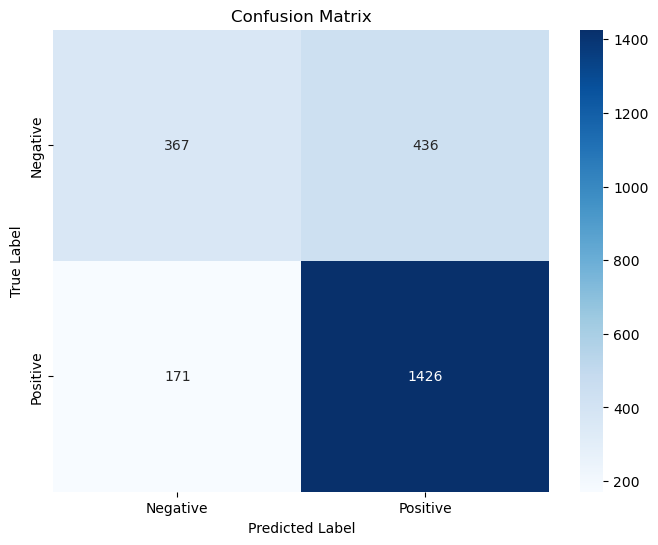

In [39]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Negative', 'Positive'])